Epoch 1, Loss: 29.418703770361258
Epoch 2, Loss: 1.1460298360274492
Epoch 3, Loss: 2.1223437148645776
Epoch 4, Loss: 2.892910283216187e+47
Epoch 5, Loss: nan
Epoch 6, Loss: nan
Epoch 7, Loss: nan
Epoch 8, Loss: nan
Epoch 9, Loss: nan
Epoch 10, Loss: nan
Epoch 11, Loss: nan
Epoch 12, Loss: nan
Epoch 13, Loss: nan
Epoch 14, Loss: nan
Epoch 15, Loss: nan
Epoch 16, Loss: nan
Epoch 17, Loss: nan
Epoch 18, Loss: nan
Epoch 19, Loss: nan
Epoch 20, Loss: nan
Epoch 21, Loss: nan
Epoch 22, Loss: nan
Epoch 23, Loss: nan
Epoch 24, Loss: nan
Epoch 25, Loss: nan
Epoch 26, Loss: nan
Epoch 27, Loss: nan
Epoch 28, Loss: nan
Epoch 29, Loss: nan
Epoch 30, Loss: nan
Epoch 31, Loss: nan
Epoch 32, Loss: nan
Epoch 33, Loss: nan
Epoch 34, Loss: nan
Epoch 35, Loss: nan
Epoch 36, Loss: nan
Epoch 37, Loss: nan
Epoch 38, Loss: nan
Epoch 39, Loss: nan
Epoch 40, Loss: nan
Epoch 41, Loss: nan
Epoch 42, Loss: nan
Epoch 43, Loss: nan
Epoch 44, Loss: nan
Epoch 45, Loss: nan
Epoch 46, Loss: nan
Epoch 47, Loss: nan
Epoch 

<ipython-input-17-6047adf39771>:44: RuntimeWarning:

invalid value encountered in scalar add

<ipython-input-17-6047adf39771>:45: RuntimeWarning:

invalid value encountered in scalar add

<ipython-input-17-6047adf39771>:46: RuntimeWarning:

invalid value encountered in scalar add




Epoch 315, Loss: nan
Epoch 316, Loss: nan
Epoch 317, Loss: nan
Epoch 318, Loss: nan
Epoch 319, Loss: nan
Epoch 320, Loss: nan
Epoch 321, Loss: nan
Epoch 322, Loss: nan
Epoch 323, Loss: nan
Epoch 324, Loss: nan
Epoch 325, Loss: nan
Epoch 326, Loss: nan
Epoch 327, Loss: nan
Epoch 328, Loss: nan
Epoch 329, Loss: nan
Epoch 330, Loss: nan
Epoch 331, Loss: nan
Epoch 332, Loss: nan
Epoch 333, Loss: nan
Epoch 334, Loss: nan
Epoch 335, Loss: nan
Epoch 336, Loss: nan
Epoch 337, Loss: nan
Epoch 338, Loss: nan
Epoch 339, Loss: nan
Epoch 340, Loss: nan
Epoch 341, Loss: nan
Epoch 342, Loss: nan
Epoch 343, Loss: nan
Epoch 344, Loss: nan
Epoch 345, Loss: nan
Epoch 346, Loss: nan
Epoch 347, Loss: nan
Epoch 348, Loss: nan
Epoch 349, Loss: nan
Epoch 350, Loss: nan
Epoch 351, Loss: nan
Epoch 352, Loss: nan
Epoch 353, Loss: nan
Epoch 354, Loss: nan
Epoch 355, Loss: nan
Epoch 356, Loss: nan
Epoch 357, Loss: nan
Epoch 358, Loss: nan
Epoch 359, Loss: nan
Epoch 360, Loss: nan
Epoch 361, Loss: nan
Epoch 362, L

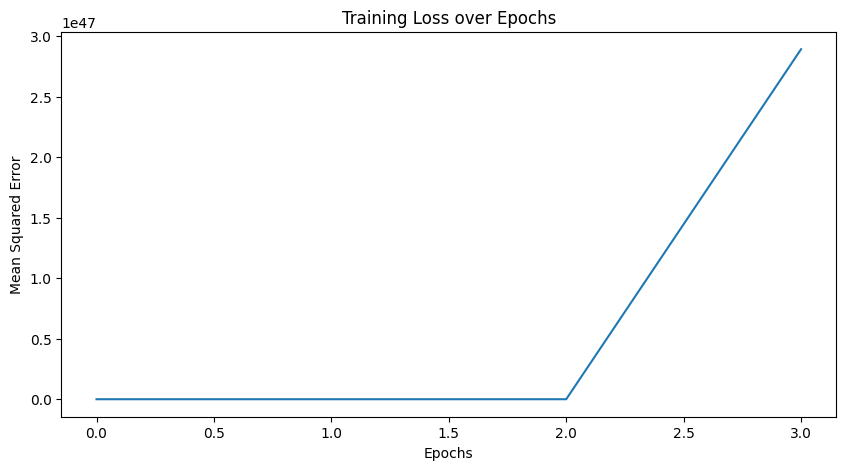


Model Performance:
Mean Squared Error: nan
Mean Absolute Error: nan
R-squared Score: nan


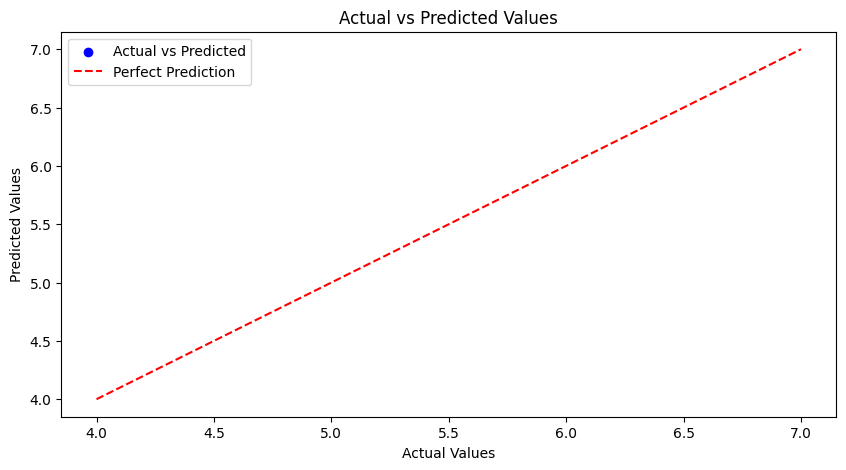

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class BackpropagationRegression:
    def __init__(self, layer_dims=[2,2,1], learning_rate=0.001):
        self.layer_dims = layer_dims
        self.learning_rate = learning_rate
        self.parameters = self.initialize_parameters()
        self.loss_history = []

    def initialize_parameters(self):
        np.random.seed(3)
        parameters = {}
        L = len(self.layer_dims)

        for l in range(1, L):
            parameters['W' + str(l)] = np.random.randn(self.layer_dims[l-1], self.layer_dims[l]) * 0.01
            parameters['b' + str(l)] = np.zeros((self.layer_dims[l], 1))

        return parameters

    def linear_forward(self, A_prev, W, b):
        Z = np.dot(W.T, A_prev) + b
        return Z

    def forward_propagation(self, X):
        A = X
        L = len(self.parameters) // 2

        for l in range(1, L+1):
            A_prev = A
            Wl = self.parameters['W' + str(l)]
            bl = self.parameters['b' + str(l)]
            A = self.linear_forward(A_prev, Wl, bl)

        return A, A_prev

    def update_parameters(self, y, y_hat, A1, X):
        # Compute gradients and update weights
        error = y - y_hat

        # Output layer updates
        self.parameters['W2'][0][0] += self.learning_rate * 2 * error * A1[0][0]
        self.parameters['W2'][1][0] += self.learning_rate * 2 * error * A1[1][0]
        self.parameters['b2'][0][0] += self.learning_rate * 2 * error

        # Hidden layer updates
        self.parameters['W1'][0][0] += self.learning_rate * 2 * error * self.parameters['W2'][0][0] * X[0][0]
        self.parameters['W1'][0][1] += self.learning_rate * 2 * error * self.parameters['W2'][0][0] * X[1][0]
        self.parameters['b1'][0][0] += self.learning_rate * 2 * error * self.parameters['W2'][0][0]

        self.parameters['W1'][1][0] += self.learning_rate * 2 * error * self.parameters['W2'][1][0] * X[0][0]
        self.parameters['W1'][1][1] += self.learning_rate * 2 * error * self.parameters['W2'][1][0] * X[1][0]
        self.parameters['b1'][1][0] += self.learning_rate * 2 * error * self.parameters['W2'][1][0]

    def train(self, X, y, epochs=100):
        for epoch in range(epochs):
            epoch_loss = []
            for i in range(X.shape[0]):
                x_sample = X[i].reshape(-1, 1)
                y_sample = y[i]

                y_hat, A1 = self.forward_propagation(x_sample)
                y_hat = y_hat[0][0]

                self.update_parameters(y_sample, y_hat, A1, x_sample)
                epoch_loss.append((y_sample - y_hat)**2)

            mean_loss = np.mean(epoch_loss)
            self.loss_history.append(mean_loss)
            print(f'Epoch {epoch+1}, Loss: {mean_loss}')

    def predict(self, X):
        predictions = []
        for sample in X:
            x_sample = sample.reshape(-1, 1)
            prediction, _ = self.forward_propagation(x_sample)
            predictions.append(prediction[0][0])
        return np.array(predictions)

    def plot_loss(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.loss_history)
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.show()

    def performance_metrics(self, X, y):
        predictions = self.predict(X)
        mse = np.mean((y - predictions)**2)
        mae = np.mean(np.abs(y - predictions))
        r2 = 1 - (np.sum((y - predictions)**2) / np.sum((y - np.mean(y))**2))

        print("\nModel Performance:")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")
        print(f"R-squared Score: {r2}")

        plt.figure(figsize=(10, 5))
        plt.scatter(y, predictions, color='blue', label='Actual vs Predicted')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
        plt.title('Actual vs Predicted Values')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.show()

# Example usage
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

X = df[['cgpa', 'profile_score']].values
y = df['lpa'].values

# Train the model
model = BackpropagationRegression(layer_dims=[2,2,1], learning_rate=0.01)
model.train(X, y, epochs=500)

# Plot loss and analyze performance
model.plot_loss()
model.performance_metrics(X, y)